In [1]:
!pip install tensorflow opencv-python matplotlib

Defaulting to user installation because normal site-packages is not writeable
  Using cached tensorflow-2.16.2-cp312-cp312-win_amd64.whl.metadata (3.3 kB)
Using cached tensorflow-2.16.2-cp312-cp312-win_amd64.whl (2.1 kB)


In [2]:
pip list


Package                           Version
--------------------------------- ------------------
absl-py                           2.1.0
aiobotocore                       2.12.3
aiohttp                           3.9.5
aioitertools                      0.7.1
aiosignal                         1.2.0
alabaster                         0.7.16
altair                            5.0.1
anaconda-anon-usage               0.4.4
anaconda-catalogs                 0.2.0
anaconda-client                   1.12.3
anaconda-cloud-auth               0.5.1
anaconda-navigator                2.6.0
anaconda-project                  0.11.1
annotated-types                   0.6.0
anyio                             4.2.0
appdirs                           1.4.4
archspec                          0.2.3
argon2-cffi                       21.3.0
argon2-cffi-bindings              21.2.0
arrow                             1.2.3
astroid                           2.14.2
astropy                           6.1.0
astropy-iers-data 

In [1]:
import tensorflow as tf
import os

In [2]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)
    

In [3]:
tf.config.list_physical_devices('GPU')

[]

2. Remove dodgy images

In [6]:
import cv2
import imghdr

In [10]:
data_dir='data'

In [22]:
os.listdir(data_dir)

['.ipynb_checkpoints', 'happy', 'sad']

In [8]:
image_exts = ['jpeg','jpg', 'bmp', 'png']

In [33]:
img = cv2.imread(os.path.join('www.google.com','happy people - Google Search - 7_5_2024 11-43-06 AM','data/happy/1000_F_42220133_toAU6USGY9jVr2XJFLssfG00cSYIJ173.jpg'))

In [21]:
import os
import cv2
import imghdr

data_dir = "data"
image_exts = ['jpeg', 'jpg', 'png', 'gif', 'webp', 'bmp', 'tiff', 'svg']

for image_class in os.listdir(data_dir):
    class_path = os.path.join(data_dir, image_class)
    
    if os.path.isdir(class_path):  # Check if it's a directory
        for image in os.listdir(class_path):
            image_path = os.path.join(class_path, image)
            
            if image.startswith('.'):
                # Skip hidden files and directories
                continue
            
            file_extension = image.split('.')[-1].lower()
            if file_extension in image_exts:
                try:
                    img = cv2.imread(image_path)
                    tip = imghdr.what(image_path)
                    if tip not in image_exts:
                        print('Image not in ext list {}'.format(image_path))
                        # Optionally remove the file if it is not in the list
                        # os.remove(image_path)
                except Exception as e:
                    print('Issue with image {}'.format(image_path))
                    # Optionally remove the file if there is an issue
                    # os.remove(image_path)
            else:
                print('Skipping non-image file {}'.format(image_path))


Skipping non-image file data\sad\person-super-depressed.jpg;w


In [35]:
import numpy as np
from matplotlib import pyplot as plt

In [36]:
data = tf.keras.utils.image_dataset_from_directory('data')

Found 234 files belonging to 2 classes.


In [37]:
data_iterator = data.as_numpy_iterator()

In [38]:
batch = data_iterator.next()

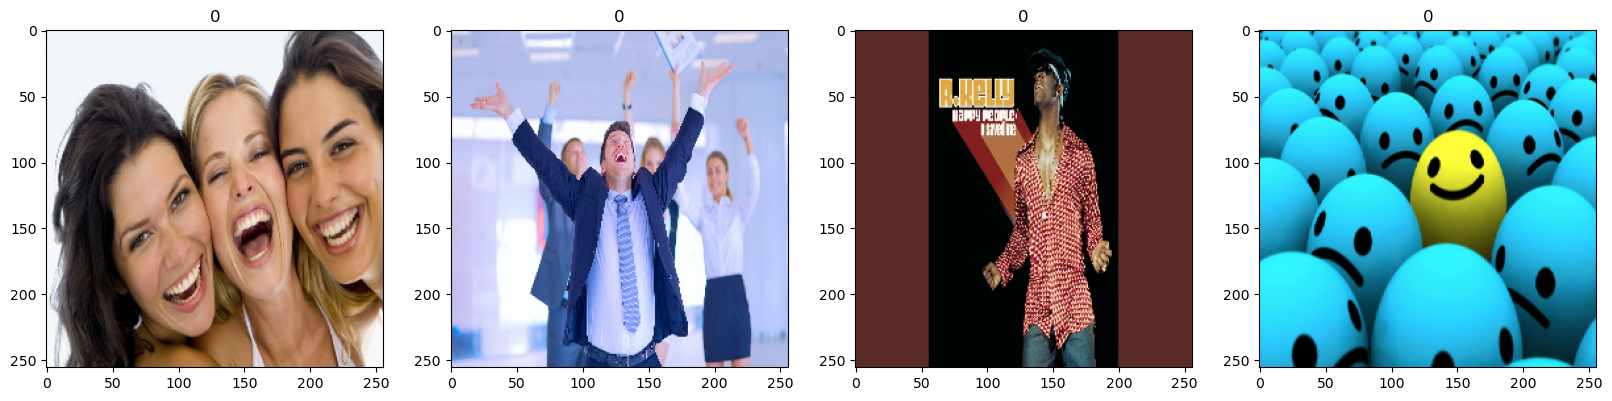

In [39]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [40]:
data = data.map(lambda x,y: (x/255, y))

In [41]:
data.as_numpy_iterator().next()

(array([[[[2.79283762e-01, 3.18499446e-01, 1.84629977e-01],
          [2.53369093e-01, 3.04885626e-01, 1.85630113e-01],
          [2.17858106e-01, 2.80067056e-01, 1.73112392e-01],
          ...,
          [1.85083132e-02, 8.12534094e-02, 6.94887042e-02],
          [2.53370106e-02, 7.23958313e-02, 6.45526946e-02],
          [2.62101721e-02, 6.54258579e-02, 6.15042895e-02]],
 
         [[3.13725501e-01, 3.45098048e-01, 2.00000003e-01],
          [2.70389080e-01, 3.12288582e-01, 1.78955257e-01],
          [2.37300858e-01, 2.88281262e-01, 1.70634195e-01],
          ...,
          [3.92156886e-03, 6.27451017e-02, 5.09803928e-02],
          [1.58854164e-02, 6.29442409e-02, 5.51011041e-02],
          [1.72947310e-02, 5.65104149e-02, 5.25888465e-02]],
 
         [[3.00153196e-01, 3.23682606e-01, 1.82506129e-01],
          [2.55943626e-01, 2.95777142e-01, 1.62443817e-01],
          [2.35556275e-01, 2.87777483e-01, 1.66407987e-01],
          ...,
          [5.36151975e-03, 5.61427698e-02, 4.7058

In [42]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [43]:
train_size

5

In [44]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [45]:
train

<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [46]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [47]:
model = Sequential()

In [49]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Input

model = Sequential()
model.add(Input(shape=(256, 256, 3)))  # Use an Input layer as the first layer
model.add(Conv2D(16, (3,3), strides=1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), strides=1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), strides=1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.summary()  # Optionally print the model summary to verify the architecture


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 254, 254, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 127, 127, 16)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 125, 125, 32)        │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 62, 62, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 60, 60, 16)          │           4,624 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 30, 30, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 14400)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 256)                 │       3,686,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │             257 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,696,625 (14.10 MB)

 Trainable params: 3,696,625 (14.10 MB)

 Non-trainable params: 0 (0.00 B)

In [50]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [51]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 254, 254, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 127, 127, 16)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 125, 125, 32)        │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 62, 62, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 60, 60, 16)          │           4,624 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 30, 30, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 14400)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 256)                 │       3,686,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │             257 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,696,625 (14.10 MB)

 Trainable params: 3,696,625 (14.10 MB)

 Non-trainable params: 0 (0.00 B)

In [52]:
logdir='logs'

In [53]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [54]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 17s 2s/step - accuracy: 0.5297 - loss: 0.9450 - val_accuracy: 0.4688 - val_loss: 0.7125
Epoch 2/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 10s 2s/step - accuracy: 0.5809 - loss: 0.6803 - val_accuracy: 0.7188 - val_loss: 0.6643
Epoch 3/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 8s 1s/step - accuracy: 0.6945 - loss: 0.6566 - val_accuracy: 0.7188 - val_loss: 0.5901
Epoch 4/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 10s 2s/step - accuracy: 0.6451 - loss: 0.6120 - val_accuracy: 0.6250 - val_loss: 0.5572
Epoch 5/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 9s 2s/step - accuracy: 0.6819 - loss: 0.5801 - val_accuracy: 0.8438 - val_loss: 0.4868
Epoch 6/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 10s 2s/step - accuracy: 0.8089 - loss: 0.4835 - val_accuracy: 0.8750 - val_loss: 0.3579
Epoch 7/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 10s 2s/step - accuracy: 0.8068 - loss: 0.4341 - val_accuracy: 0.8438 - val_loss: 0.3224
Epoch 8/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 10s 2s/step - accuracy: 0.9161 - loss: 0.3219 - val_accuracy: 0.9688 - val_loss: 0.1490
Epoch 9/20

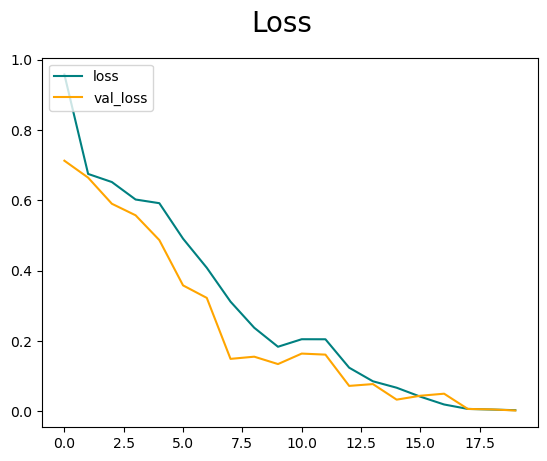

In [55]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

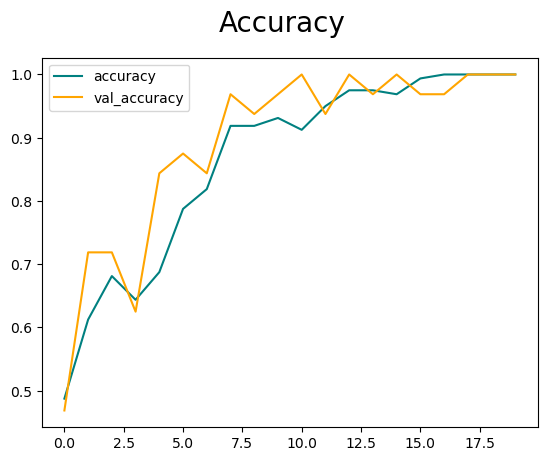

In [56]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [57]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [58]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [59]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

In [60]:
print(pre.result(), re.result(), acc.result())

tf.Tensor(0.0, shape=(), dtype=float32) tf.Tensor(0.0, shape=(), dtype=float32) tf.Tensor(0.0, shape=(), dtype=float32)


In [61]:
import cv2

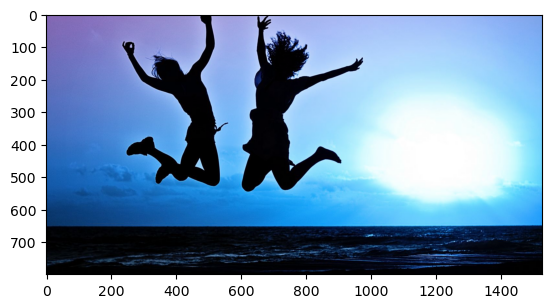

In [67]:

img = cv2.imread('data/happy/_happy_jumping_on_beach-40815.jpg')
plt.imshow(img)
plt.show()

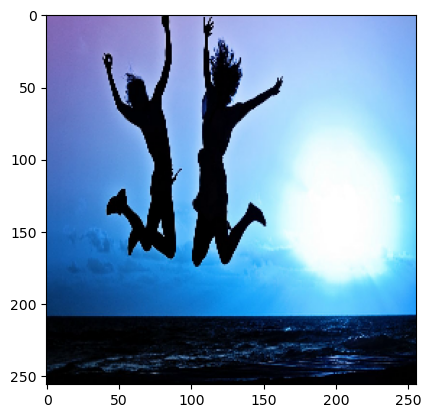

In [68]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [69]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 272ms/step


In [70]:
yhat

array([[3.0167645e-05]], dtype=float32)

In [71]:
if yhat > 0.5: 
    print(f'Predicted class is Sad')
else:
    print(f'Predicted class is Happy')

Predicted class is Happy


In [72]:
from tensorflow.keras.models import load_model

In [74]:
import os

# Create the models directory if it doesn't exist
os.makedirs('models', exist_ok=True)

# Save the model in the native Keras format
model.save(os.path.join('models', 'imageclassifier.keras'))


In [76]:
from keras.models import load_model

# Load the model from the .keras file
model_path = os.path.join('models', 'imageclassifier.keras')
new_model = load_model(model_path)


C:\Users\LENOVO\AppData\Roaming\Python\Python312\site-packages\keras\src\saving\saving_lib.py:576: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 12 variables whereas the saved optimizer has 22 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [77]:
import os

model_path = os.path.join('models', 'imageclassifier.keras')

if os.path.exists(model_path):
    new_model = load_model(model_path)
    print("Model loaded successfully.")
else:
    print(f"Error: The file {model_path} does not exist.")


Model loaded successfully.
